In [4]:
from keras.models import Sequential, load_model,model_from_yaml
from keras.layers import Dense, Activation, Dropout, LSTM, CuDNNGRU, CuDNNLSTM
from keras.optimizers import RMSprop
import random
import sys
import numpy as np
import os
import time

In [5]:
#/* Find the maximum length of lines in the files */
maxlengthfname = "/notebooks/data/LARGES_SEQMODELS/DATA/filelength"
linearray = []
maxval = 0
with open(maxlengthfname, 'r') as fin:
    linearray = fin.readlines()
    for line in linearray:
        if '.' in line:
            val = int(line.split('.')[0].strip())
            if val > maxval:
                maxval = val  
maxval

26

In [12]:
directoryfname = "/notebooks/data/LARGES_SEQMODELS/DATA/"
linearray = []
actualarray =[]
X_Vector = []
Y_Vector = []
START = "1000000000000000000000000000000000000000"
STOP  = "1100000000000000000000000000000000000000"
BLANK = "1110000000000000000000000000000000000000"
#cvb =   "001010000000001001001010011010000001010"

startlist = [list(map(int, x)) for x in START]
stoplist = [list(map(int, x)) for x in STOP]
blanklist = [list(map(int, x)) for x in BLANK]
for datafname in os.listdir(directoryfname):
    localXVector = []
    localYVector = []
    if datafname.startswith("feature_"):
        with open(directoryfname+datafname, 'r') as fin:
            linearray = fin.readlines()
            itr = 0
            localXVector.append(startlist)
            localYVector.append("START")
            for line in range(maxval):
                if line < len(linearray):
                    ln = linearray[line].split(" ")
                    #print(ln)
                    localYVector.append(ln[1].strip())
                    localXVector.append([[0]] +  [list(map(int, x)) for x in ln[0]])
                else:
                    localXVector.append(blanklist)
                    localYVector.append("BLANK")
            localXVector.append(stoplist)
            localYVector.append("STOP")  
        X_Vector.append(localXVector)
        Y_Vector.append(localYVector)
X_Vector = np.array(X_Vector)
Y_Vector = np.array(Y_Vector)
print("done")

done


In [13]:
np.shape(X_Vector)

(4422, 28, 40, 1)

In [14]:
np.shape(Y_Vector)

(4422, 28)

In [15]:
vocab = list(set(Y_Vector.flatten()))
vocabdict ={}
for itr in range(len(vocab)):
    vocabdict[vocab[itr]] = itr
vocabdict
#{'BLANK': 4, 'EXP': 1, 'START': 0, 'STOP': 3, 'UNEXP': 2}

{'BLANK': 4, 'EXP': 1, 'START': 0, 'STOP': 3, 'UNEXP': 2}

In [16]:
Y_Vector

array([['START', 'EXP', 'EXP', ..., 'BLANK', 'BLANK', 'STOP'],
       ['START', 'EXP', 'EXP', ..., 'BLANK', 'BLANK', 'STOP'],
       ['START', 'EXP', 'EXP', ..., 'BLANK', 'BLANK', 'STOP'],
       ...,
       ['START', 'EXP', 'EXP', ..., 'BLANK', 'BLANK', 'STOP'],
       ['START', 'EXP', 'EXP', ..., 'BLANK', 'BLANK', 'STOP'],
       ['START', 'EXP', 'EXP', ..., 'BLANK', 'BLANK', 'STOP']],
      dtype='<U5')

In [9]:
data = data.reshape((1, 10, 1))

In [10]:
print(data)

[[[0.1]
  [0.2]
  [0.3]
  [0.4]
  [0.5]
  [0.6]
  [0.7]
  [0.8]
  [0.9]
  [1. ]]]


In [13]:
#!pip install keras
#{'BLANK': 1,
 #'FETCHBOX': 0,
 #'OBSERVE': 3,
 #'START': 2,
 #'STOP': 4,
 #'UNEXP': 6,
 #'UNFETCH': 5}


    100% |################################| 317kB 6.2MB/s ta 0:00:011
    100% |################################| 276kB 7.2MB/s ta 0:00:011
  Running setup.py bdist_wheel for pyyaml ... done
  Stored in directory: /root/.cache/pip/wheels/ad/da/0c/74eb680767247273e2cf2723482cb9c924fe70af57c334513f
Successfully built pyyaml


In [17]:
from keras.models import Sequential, load_model,model_from_yaml
from keras.layers import Dense, Activation, Dropout, LSTM, CuDNNGRU, CuDNNLSTM
from keras.optimizers import RMSprop, SGD
import random
import sys

In [19]:
X_Vector = X_Vector.reshape((4422, 28, 40))

In [20]:
Y_Vector_actual = []

for ity in range(len(Y_Vector)):
    Y_Vector_local = []
    for ityy in range(len(Y_Vector[ity])):
        cool_vector = [0,0,0,0,0]
        cool_vector[vocabdict[Y_Vector[ity][ityy]]] = 1
        Y_Vector_local.append(cool_vector)
    Y_Vector_actual.append(Y_Vector_local)
    
Y_Vector_actual = np.array(Y_Vector_actual)
Y_Vector_actual

array([[[1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0],
        ...,
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0]],

       [[1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0],
        ...,
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0]],

       [[1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0],
        ...,
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0]],

       ...,

       [[1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0],
        ...,
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0]],

       [[1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0],
        ...,
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0]],

       [[1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0],
        ...,
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0]]

In [21]:
np.shape(X_Vector)

(4422, 28, 40)

In [22]:
np.shape(Y_Vector_actual)

(4422, 28, 5)

In [26]:
#model 
model = Sequential()
model.add(CuDNNLSTM(128,input_shape=(28, 40), return_sequences=True))
model.add(CuDNNLSTM(128, return_sequences=True))
model.add(Dense(5))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_3 (CuDNNLSTM)     (None, 28, 128)           87040     
_________________________________________________________________
cu_dnnlstm_4 (CuDNNLSTM)     (None, 28, 128)           132096    
_________________________________________________________________
dense_2 (Dense)              (None, 28, 5)             645       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 5)             0         
Total params: 219,781
Trainable params: 219,781
Non-trainable params: 0
_________________________________________________________________


In [27]:
algorithm = SGD(lr=0.1, momentum=0.3)
model.compile(optimizer=algorithm, loss='mean_squared_error', metrics=['accuracy'])

In [38]:
from sklearn.model_selection import train_test_split
data_train, data_test, labels_train, labels_test = train_test_split(X_Vector, Y_Vector_actual, test_size=0.20, random_state=39)
history = model.fit(X_Vector, Y_Vector_actual, validation_split=0.20, batch_size=10, epochs=100)
# list all data in history
print(history.history.keys())

Train on 3537 samples, validate on 885 samples
Epoch 1/100
3537/3537 [==============================] - 3s 935us/step - loss: 5.7911e-04 - acc: 0.9971 - val_loss: 0.0039 - val_acc: 0.9883
Epoch 2/100
3537/3537 [==============================] - 3s 941us/step - loss: 5.7061e-04 - acc: 0.9971 - val_loss: 0.0039 - val_acc: 0.9883
Epoch 3/100
3537/3537 [==============================] - 3s 944us/step - loss: 5.6974e-04 - acc: 0.9974 - val_loss: 0.0039 - val_acc: 0.9885
Epoch 4/100
3537/3537 [==============================] - 3s 946us/step - loss: 5.7326e-04 - acc: 0.9973 - val_loss: 0.0038 - val_acc: 0.9888
Epoch 5/100
3537/3537 [==============================] - 3s 938us/step - loss: 5.6032e-04 - acc: 0.9975 - val_loss: 0.0038 - val_acc: 0.9885
Epoch 6/100
3537/3537 [==============================] - 3s 939us/step - loss: 5.7131e-04 - acc: 0.9973 - val_loss: 0.0039 - val_acc: 0.9885
Epoch 7/100
3537/3537 [==============================] - 3s 949us/step - loss: 5.7760e-04 - acc: 0.9974 - v

In [29]:
import matplotlib.pyplot as plt

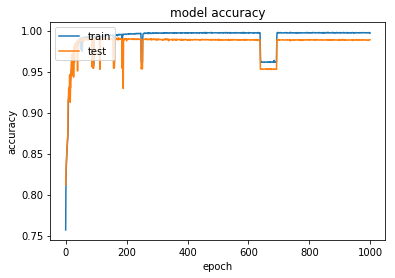

In [30]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

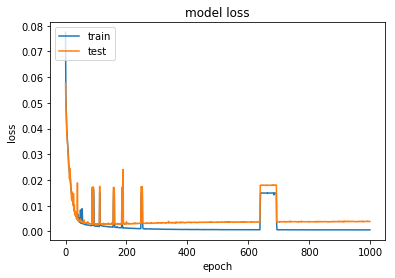

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
model.save("Sequential_Labels_DNNLSTM_55.h5")

In [33]:
Y_Vector_actual[546]

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0]])

In [34]:
Y_Vector[546]

array(['START', 'EXP', 'EXP', 'EXP', 'EXP', 'EXP', 'EXP', 'EXP', 'EXP',
       'EXP', 'EXP', 'EXP', 'EXP', 'EXP', 'EXP', 'EXP', 'EXP', 'BLANK',
       'BLANK', 'BLANK', 'BLANK', 'BLANK', 'BLANK', 'BLANK', 'BLANK',
       'BLANK', 'BLANK', 'STOP'], dtype='<U5')

In [35]:
X_Vector[546]

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 1, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]])

In [37]:
resultss = model.predict(X_Vector[546].reshape(1, 28, 40))
for results in resultss:
    for res in results:
        maxi = np.max(res)
        print(np.where(res == maxi))  

(array([0]),)
(array([1]),)
(array([1]),)
(array([1]),)
(array([1]),)
(array([1]),)
(array([1]),)
(array([1]),)
(array([1]),)
(array([1]),)
(array([1]),)
(array([1]),)
(array([1]),)
(array([1]),)
(array([1]),)
(array([1]),)
(array([1]),)
(array([4]),)
(array([4]),)
(array([4]),)
(array([4]),)
(array([4]),)
(array([4]),)
(array([4]),)
(array([4]),)
(array([4]),)
(array([4]),)
(array([3]),)


In [67]:
 print (sys.version)

3.5.2 (default, Nov 23 2017, 16:37:01) 
[GCC 5.4.0 20160609]


In [69]:
import tensorflow as tf
print(tf.__version__)

1.12.0


In [70]:
!pip list

Package             Version               
------------------- ----------------------
absl-py             0.6.1                 
astor               0.7.1                 
backcall            0.1.0                 
bleach              3.0.2                 
cycler              0.10.0                
decorator           4.3.0                 
defusedxml          0.5.0                 
entrypoints         0.2.3                 
gast                0.2.0                 
grpcio              1.16.0                
h5py                2.8.0                 
ipykernel           5.1.0                 
ipython             7.1.1                 
ipython-genutils    0.2.0                 
ipywidgets          7.4.2                 
jedi                0.13.1                
Jinja2              2.10                  
jsonschema          2.6.0                 
jupyter             1.0.0                 
jupyter-client      5.2.3                 
jupyter-console     6.0.0                 
jupyter-cor